In [1]:
import numpy as np
from numpy.linalg import pinv  # pseudo-inverse
np.set_printoptions(precision=2, sign=' ', suppress=True)

In [2]:
X = np.array([[1, 2104, 5, 1, 45],
              [1, 1416, 3, 2, 40],
              [1, 1534, 3, 2, 30],
              [1,  852, 2, 1, 36]])

In [3]:
print(X)

[[   1 2104    5    1   45]
 [   1 1416    3    2   40]
 [   1 1534    3    2   30]
 [   1  852    2    1   36]]


In [4]:
y = np.array([[460.],
              [232.],
              [315.],
              [178.]])

In [5]:
print(y)

[[ 460.]
 [ 232.]
 [ 315.]
 [ 178.]]


In [6]:
theta=pinv(X)@y

In [7]:
theta

array([[188.4 ],
       [  0.39],
       [-56.14],
       [-92.97],
       [ -3.74]])

In [8]:
print(X @ theta)

[[ 460.]
 [ 232.]
 [ 315.]
 [ 178.]]


In [11]:
np.allclose(X @ theta, y) 

True

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.set_printoptions(precision=2)

In [16]:
def lowess(x, y, f=2. / 3., iter=3):
    """Robust locally weighted regression.

    Inputs:
       - x, y: dataset
       - f: smoothing parameter
       - iter: number of robustifying iterations
    """
    n = len(x)
    r = int(math.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    y_pred = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = np.linalg.solve(A, b)
            y_pred[i] = beta[0] + beta[1] * x[i]

        residuals = y - y_pred
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return y_pred

In [17]:
# create 100 random sample (x, y)
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)

In [42]:
y_pred = lowess(x, y, f=0.4, iter=3)

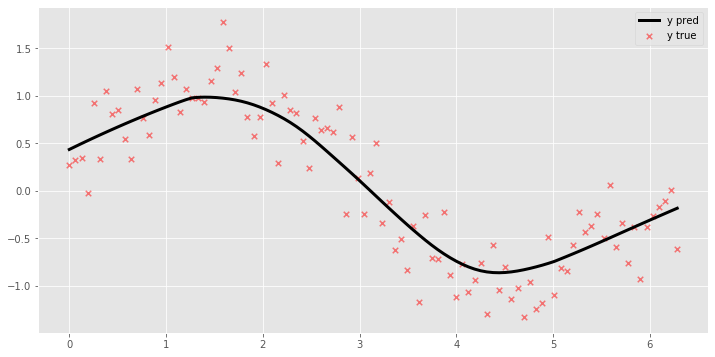

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.legend()
plt.show()

In [1]:
import numpy as np
import math

In [2]:
np.random.rand()

0.43714078163013825

In [3]:
np.random.rand()*6

5.586584977876963

In [4]:
np.floor(np.random.rand()*6)

1.0

In [5]:
int(np.floor(np.random.rand()*6))

2

In [6]:
counts = np.zeros((6,),dtype=np.int32)

for i in range(1000):
    r=int(np.floor(np.random.rand()*6))
    counts[r-1]+=1
    
print(counts)

[182 159 163 167 161 168]


In [7]:
counts = np.zeros((6,),dtype=np.int32)

for i in range(1000):
    r=np.random.randint(1,7)
    counts[r-1]+=1
    
print(counts)

[151 162 165 178 155 189]


In [8]:
def throw_dice(n=6):
    """ this is docstring test
    """
    return int(math.floor(np.random.rand()*n))+1

In [9]:
throw_dice(100)

24

In [36]:
def square(x):
    return x**2
    
for i in range(1,11):
    print("%2d^2: %3d" %(i,square(i)))

 1^2:   1
 2^2:   4
 3^2:   9
 4^2:  16
 5^2:  25
 6^2:  36
 7^2:  49
 8^2:  64
 9^2:  81
10^2: 100


In [42]:
def square_and_cube(x):
    return x**2,x**3,x**4

a,b,c=square_and_cube(5)
print(c)

625
